In [1]:
import numpy as np
import pandas as pd

import os

In [2]:
#################################
def Merge(indexOverlap,indexNonOverlap, MergePath, ResubmitPath, Print = False):
        path = {}
        path["Resubmit"] = ResubmitPath
        path["Merge"]    = MergePath

        File = {}
        for ind,i in zip(indexOverlap,np.arange(1,len(indexOverlap)+1)):
                File["Resubmit"] = "Output_"+  str(i)+".root"
                File["Merge"]    = "Output_"+str(ind)+".root"
                cmd = "cp "+path["Resubmit"]+File["Resubmit"]+" "+path["Merge"]+File["Merge"]
                if Print:
                        print(cmd)
                else:
                        os.system(cmd)

        resubmitRange = 571
        for ind,i in zip(indexNonOverlap, np.arange(len(indexOverlap)+1,resubmitRange+1)):
                File["Resubmit"] = "Output_"+  str(i)+".root"
                File["Merge"]    = "Output_"+str(ind)+".root"
                cmd = "cp "+path["Resubmit"]+File["Resubmit"]+" "+path["Merge"]+File["Merge"]
                if Print:
                        print(cmd)
                else:
                        os.system(cmd)

In [3]:
def SaveIndex(File,index):
        df = pd.DataFrame(index)
        df.to_csv(File)

In [4]:
def OverlapCheck(df1,df2):
        indexOverlap, indexNonOverlap= [],[]

        Overlap,NonOverlap = 0,0
        for i in df1['index']:
                if i in list(df2['index']):
                        Overlap += 1
                        indexOverlap.append(i)
                else:
                        NonOverlap += 1
                        indexNonOverlap.append(i)
                        #print(i)

        print('Total Overlap in resubmit and samples in EOS '+str(Overlap))
        print('Total NONOverlap in resubmit and samples in EOS '+str(NonOverlap))

        return indexOverlap, indexNonOverlap

In [26]:
def VerifyFileNumber(EOS,Failed,Resubmit,eosFailOverlap,gaps):
    print('----'+'  F:'+str(len(Failed))+' R:'+str(len(Resubmit))+' EOS:'+str(len(EOS))+' Gaps:'+str(len(gaps)))
    
    EOSNonoverlap = len(EOS)-len(eosFailOverlap)
    ResubmitNonoverlap = len(Resubmit)-len(eosFailOverlap)
    print('-- EOS Overlap Files         : '+str(len(eosFailOverlap)))
    print('-- EOS NonOverlap Files      : '+str(EOSNonoverlap))
    print('-- Resubmit NonOverlap Files : '+str(ResubmitNonoverlap))
    
    print('-- Resubmit not in Gaps Files: '+str(ResubmitNonoverlap-len(gaps)))
    
    print('\n')
    #print('-- Files: '+str(len(EOS)+ResubmitNonoverlap))
    print('-- Files Gaps: '+str(len(EOS)+len(gaps)))
    
    print('-- Files     : '+str(len(EOS)+len(gaps)+(ResubmitNonoverlap-len(gaps))))
    
    print('\n')
    print('-- Finish estimate:'+str(len(EOS)-EOSNonoverlap))

In [6]:
def GetOverlap(EOS,Failed):
    Overlap = []
    for eos in EOS:
            if eos in Failed:
                Overlap.append(eos)
    return Overlap

def GetNonOverlap(EOS,Failed):
    Overlap = GetOverlap(EOS,Failed)
    NonOverlap = []
    for fail in Failed :
            if fail not in Overlap:
                NonOverlap.append(fail)
    return NonOverlap

In [7]:
def GetGap(EOS,Failed,maximum=0,Print=False):
    if maximum <= 0:
        maximum = np.max(EOS)
    
    
    gaps = []    
    for ind in np.arange(1,maximum):
        if ind not in Failed:
            if ind not in EOS:
                gaps.append(ind)
            
    '''
    for ind in np.arange(1,maximum):
        if ind not in Failed:
            if ind not in gaps:
                gaps.append(ind)
    '''
    if Print:
        print(maximum)
        print(gaps)
    return gaps

In [35]:
data = 'data'
era = '2017'

Samples = {}
Samples['Data'] = ['DoubleMuonRun'+era+'B',
                   'DoubleMuonRun'+era+'C',
                   'DoubleMuonRun'+era+'D',
                   'DoubleMuonRun'+era+'E',
                   'DoubleMuonRun'+era+'F',
                   'DoubleEGRun'+era+'B',
                   'DoubleEGRun'+era+'C',
                   'DoubleEGRun'+era+'D',
                   'DoubleEGRun'+era+'E',
                   'DoubleEGRun'+era+'F',
                   
                  ]
Samples['MC'] = ['ZG','DYJets','TTTo2L2Nu',
                 'WJets','WWTo2L2Nu','WZTo2L2Nu',
                 'ZZTo2L2Q','ZZTo4L','ZZTo2L2Nu']



Total = {
        'DoubleMuonRun2017B':0,
        'DoubleMuonRun2017C':0,
        'DoubleMuonRun2017D':0,
        'DoubleMuonRun2017E':2658,
        'DoubleMuonRun2017F':4124,
        'DoubleEGRun2017B'  :3080,
        'DoubleEGRun2017C'  :0,
        'DoubleEGRun2017D'  :0,
        'DoubleEGRun2017E'  :0,
        'DoubleEGRun2017F'  :3842,
        # Total estimates come from grafana
        'ZG'        :0,
        'DYJets'    :8449,
        'TTTo2L2Nu' :46,
        'WJets'     :0,
        'WWTo2L2Nu' :0,
        'WZTo2L2Nu' :0,
        'ZZTo2L2Q'  :0,
        'ZZTo4L'    :0,
        'ZZTo2L2Nu' :0,
        }


In [9]:
ids = {}
ids['DoubleMuon'] = {}
ids['DoubleEG'] = {}

ids['DoubleMuon']['resubmit'] = {
                                'B':'',
                                'C':'',
                                'D':'',
                                'E':'',
                                'F':'',
                                }
ids['DoubleMuon']['merge'] = {
                            'B':'',
                            'C':'',
                            'D':'',
                            'E':'',
                            'F':'',
                            }


ids['DoubleEG']['resubmit'] = {
                    'B':'200212_054029',
                    'C':'',
                    'D':'',
                    'E':'',
                    'F':'200212_053749',
                    }
ids['DoubleEG']['merge'] = { 'B':'200120_224406',
                 'C':'200120_224612',
                 'D':'200120_224756',
                 'E':'200120_224942',
                 'F':'200212_053749',
                 }
############

pathEOS = "/eos/uscms/store/user/lpchzg/corderom/"+data+"_"+era+"/"
pathEG  = "DoubleEG"
pathData = pathEG

path = {}



for dataType in ['Muon','EG']:
        pathData = 'Double'+dataType
        path[pathData] = {}
        
        path[pathData]['merge'] = {}
        path[pathData]['resubmit'] = {}
        for run in ['B','C','D','E','F']:
                path[pathData]['merge'][run]    = era+"_"+data+"_legacy_trigBits_"+pathData+"_Run2017"+run+"-31Mar2018-v1/"
                path[pathData]['resubmit'][run] = era+"_"+data+"_legacy_trigBits_resubmit_"+pathData+"_Run2017"+run+"-31Mar2018-v1/"+ids[pathData]['resubmit'][run]

In [10]:
#Jobs = ['eosJobs/','failedJobs/','retryJobs/']
Jobs = 'failedJobs'

df = {}
for jobType in ['eos','failed','resubmit']:
    df[jobType] = {}
    
    #print('------' + jobType)
    for data in ['Data','MC']:
        df[jobType][data] = {}
        
        for files in os.listdir(jobType+'Jobs'):
            
            if '.txt' in files:  
                filename = jobType+'Jobs'+'/'+files
                for samp in Samples[data]:
                    if samp in filename and ("resubmit" not in files):
                        try:
                            df[jobType][data][samp] = pd.read_csv(filename)
                            #print(files,len(df[jobType][data][samp]))
                        except:
                            #print('Not Oppened '+jobType +' '+data+samp)
                            print(filename)
                            #print(filename+' is empty')
                            continue

                #print(df)
                #print(files)
        print('\n')







failedJobs/index_DoubleMuonRun2017C_Data_2017.txt
failedJobs/index_DoubleEGRun2017C_Data_2017.txt
failedJobs/index_DoubleMuonRun2017D_Data_2017.txt
failedJobs/index_DoubleEGRun2017D_Data_2017.txt
failedJobs/index_DoubleMuonRun2017B_Data_2017.txt
failedJobs/index_DoubleEGRun2017E_Data_2017.txt


failedJobs/index_WWTo2L2Nu_MC_2017.txt
failedJobs/index_ZZTo2L2Q_MC_2017.txt
failedJobs/index_ZZTo2L2Nu_MC_2017.txt
failedJobs/index_ZGToLLG_MC_2017.txt




resubmitJobs/index_TTTo2L2Nu_MC_2017.txt




In [20]:
df['eos']['Data']['DoubleMuonRun2017F']

,Jobs
0,10
1,100
2,1000
3,1001
4,1002
5,1003
6,1004
7,1005
8,1006
9,1007


In [37]:
for data in ['Data']:
    for dataType in ['Muon','EG']:
        pathData = 'Double'+dataType
        for run in ['B','C','D','E','F']:
            ################
            
            if run != 'F':
                continue
            #if dataType != 'EG':
            if dataType != 'Muon':
                continue
            
            ######################
            try :
                Failed   = df['failed']  [data][pathData+'Run'+era+run]['Jobs'].values
                Resubmit = df['resubmit'][data][pathData+'Run'+era+run]['Jobs'].values
                EOS      = df['eos']     [data][pathData+'Run'+era+run]['Jobs'].values
            except:
                continue
                
            eosFailOverlap    = GetOverlap(EOS,Failed)
            eosFailNonOverlap = GetNonOverlap(EOS,Failed)
            gaps              = GetGap(EOS,Failed,maximum=Total['Double'+dataType+'Run2017'+run])

            
            cmd = []
            
            ini   = 1
            final = ini + len(eosFailOverlap)+1
            varLoop = eosFailOverlap
            print('Overlap',ini,final)
            for overlap,i in zip(varLoop,np.arange(ini,final)):
                replacement = pathEOS+pathData+'_merge/'+path[pathData]['resubmit'][run]+"/Output_"+str(i)+".root"
                #original    = pathEOS+pathData+'_merge/'+path[pathData]   ['merge'][run]+ids[pathData]   ['merge'][run]+"/Output_"+str(overlap)+".root"
                original    = pathEOS+pathData+'_merge/Double'+dataType+run+'_ResubmitCorrectIndex/Output_'+str(overlap)+".root"
                cmd.append("cp "+replacement+" "+original)
                #print(replacement)
                #print(original)
            
            ini   = final-1
            final = ini + len(eosFailNonOverlap)+10
            varLoop = eosFailNonOverlap
            print('NonOverlap',ini,final)
            for overlap,i in zip(varLoop,np.arange(ini,final)):
                replacement = pathEOS+pathData+'_merge/'+path[pathData]['resubmit'][run]+"/Output_"+str(i)+".root"
                #original    = pathEOS+pathData+'_merge/'+path[pathData]   ['merge'][run]+ids[pathData]   ['merge'][run]+"/Output_"+str(overlap)+".root"
                original    = pathEOS+pathData+'_merge/Double'+dataType+run+'_ResubmitCorrectIndex/Output_'+str(overlap)+".root"
                cmd.append("cp "+replacement+" "+original)
                #print(replacement)
                #print(original)
                #print(i,overlap)


            if len(gaps) != 0:
                for j,k in zip(np.arange(len(eosFailOverlap),len(Resubmit)), np.arange(len(gaps))):
                    replacement = pathEOS+pathData+'_merge/'+path[pathData]['resubmit'][run]+"/Output_"+str(j)+".root"
                    #original    = pathEOS+pathData+'_merge/'+path[pathData]   ['merge'][run]+ids[pathData]   ['merge'][run]+"/Output_"+str(gaps[k])+".root"
                    original    = pathEOS+pathData+'_merge/Double'+dataType+run+'_ResubmitCorrectIndex/Output_'+str(gaps[k])+".root"
                cmd.append("cp "+replacement+" "+original)
                
                
            print('\n')
            print(pathData+'Run'+era+run)
            VerifyFileNumber(EOS,Failed,Resubmit,eosFailOverlap,gaps)
            
            #for cmdi in cms:
            #    os.system(cmd)
            dfCMD= pd.DataFrame(cmd)
            dfCMD.to_csv('/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/LPC/commands_'+dataType+run+'.txt',index=False)

('Overlap', 1, 923)
('NonOverlap', 922, 1151)


DoubleMuonRun2017F
----  F:1140 R:1155 EOS:3898 Gaps:7
-- EOS Overlap Files         : 921
-- EOS NonOverlap Files      : 2977
-- Resubmit NonOverlap Files : 234
-- Resubmit not in Gaps Files: 227


-- Files Gaps: 3905
-- Files     : 4132


-- Finish estimate:921


In [25]:
#len(eosFailOverlap) + len(eosFailNonOverlap)
def VerifyFileNumber(EOS,Failed,Resubmit,eosFailOverlap,gaps):
    print('----'+'  F:'+str(len(Failed))+' R:'+str(len(Resubmit))+' EOS:'+str(len(EOS))+' Gaps:'+str(len(gaps)))
    
    EOSNonoverlap = len(EOS)-len(eosFailOverlap)
    ResubmitNonoverlap = len(Resubmit)-len(eosFailOverlap)
    print('-- EOS Overlap Files         : '+str(len(eosFailOverlap)))
    print('-- EOS NonOverlap Files      : '+str(EOSNonoverlap))
    print('-- Resubmit NonOverlap Files : '+str(ResubmitNonoverlap))
    
    print('-- Resubmit not in Gaps Files: '+str(ResubmitNonoverlap-len(gaps)))
    
    print('\n')
    #print('-- Files: '+str(len(EOS)+ResubmitNonoverlap))
    print('-- Files Gaps: '+str(len(EOS)+len(gaps)))
    
    print('-- Files     : '+str(len(EOS)+len(gaps)+(ResubmitNonoverlap-len(gaps))))
    
    print('\n')
    print('-- Finish estimate:'+str(len(EOS)-EOSNonoverlap))

2977

In [36]:
'''
DYJets
finished 3827
failed   3448
Removed  1174
'''
for data in ['MC']:
    for samp in Samples[data] :
        try :
            Failed   = df['failed']  [data][samp]['Jobs'][2:].values
            Resubmit = df['resubmit'][data][samp]['Jobs'].values
            EOS      = df['eos']     [data][samp]['Jobs'].values
        except:
            continue        

        eosFailOverlap    = GetOverlap(EOS,Failed)
        eosFailNonOverlap = GetNonOverlap(EOS,Failed)
        gaps              = GetGap(EOS,Failed,maximum=Total[samp])

        '''
        for overlap,i in zip(eosFailOverlap,np.arange(len(eosFailOverlap))):
            replacement = pathEOS+pathEG+'_merge/'+path['resubmit'][run]+ids['resubmit'][run]+"/Output_"+str(i)+".root"
            original    = pathEOS+pathEG+'_merge/'+path['merge'][run]+ids['merge'][run]+"/Output_"+str(overlap)+".root"

            print(i,overlap)

            cmd = "cp "+replacement+" "+original
            #os.system(cmd)

        for j,k in zip(np.arange(len(eosFailOverlap),len(Resubmit)), np.arange(len(Resubmit)-len(eosFailOverlap))):
            replacement = pathEOS+pathEG+'_merge/'+path['resubmit'][run]+ids['resubmit'][run]+"/Output_"+str(j)+".root"
            original    = pathEOS+pathEG+'_merge/'+path['merge'][run]+ids['merge'][run]+"/Output_"+str(gaps[k])+".root"

            print(j,gaps[k])

            cmd = "cp "+replacement+" "+original
            #os.system(cmd)
        '''
        print(samp)
        VerifyFileNumber(EOS,Failed,Resubmit,eosFailOverlap,gaps)

DYJets
----  F:4998 R:4621 EOS:5307 Gaps:1329
-- EOS Overlap Files         : 3185
-- EOS NonOverlap Files      : 2122
-- Resubmit NonOverlap Files : 1436
-- Resubmit not in Gaps Files: 107


-- Files Gaps: 6636
-- Files     : 6743


-- Finish estimate:3185
WJets
----  F:2072 R:5 EOS:2074 Gaps:0
-- EOS Overlap Files         : 2072
-- EOS NonOverlap Files      : 2
-- Resubmit NonOverlap Files : -2067
-- Resubmit not in Gaps Files: -2067


-- Files Gaps: 2074
-- Files     : 7


-- Finish estimate:2072
ZZTo4L
----  F:1212 R:6 EOS:1213 Gaps:1
-- EOS Overlap Files         : 1212
-- EOS NonOverlap Files      : 1
-- Resubmit NonOverlap Files : -1206
-- Resubmit not in Gaps Files: -1207


-- Files Gaps: 1214
-- Files     : 7


-- Finish estimate:1212


In [32]:
Samples[data] 

['ZG',
 'DYJets',
 'TTTo2L2Nu',
 'WJets',
 'WWTo2L2Nu',
 'WZTo2L2Nu',
 'ZZTo2L2Q',
 'ZZTo4L',
 'ZZTo2L2Nu']

In [608]:
dataType = 'EG'
#dataType = 'Muon'
run = 'F'

Resubmit = df['resubmit']['Data']['Double'+dataType+'Run2017'+run]['Jobs'].values
Failed   = df['failed']['Data']['Double'+dataType+'Run2017'+run]['Jobs'].values
EOS      = df['eos']['Data']['Double'+dataType+'Run2017'+run]['Jobs'].values

eosFailOverlap    = GetOverlap(EOS,Failed)
eosFailNonOverlap = GetNonOverlap(EOS,Failed)
gaps              = GetGap(EOS,Failed,maximum=Total['Double'+dataType+'Run2017'+run])

    
T = Total['Double'+dataType+'Run2017'+run]
R = len(Resubmit)
F = len(Failed)
E = len(EOS)
G = len(gaps)
Over = len(eosFailOverlap)
NonOver = len(eosFailNonOverlap)

In [609]:
print(T,R,F,E,G,Over)

(3842, 571, 571, 3735, 0, 464)


In [616]:
TXT = pd.read_csv('/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/LPC/indexDoubleEGF.txt')

In [621]:
for I in np.arange(max(TXT['Jobs'].values)):
    if not I in TXT['Jobs'].values:
        print(I)

0
974


In [581]:
E+NonOver+G

3842

In [582]:
#np.sum(Failed==5)
gaps

[]

In [583]:
T + (R - Over-G)

3949

In [584]:
R-Over-NonOver-G

0

In [525]:
T-(E+G)

107

In [526]:
print(E-F,R,F)

(3164, 571, 571)


In [ ]:
Muon_Run2017E
    finished    99.8% (2654/2658)
    transferring 0.2% (   4/2658) 
    


DoubleMuonRun2017E
----  F:2 R:4 EOS:2657 Gaps:2
-- EOS NonOverlap Files: 2655
-- Resubmit NonOverlap Files: 2
-- Resubmit not in Gaps Files: 0


-- Files Gaps: 2659
-- Files: 2659


-- Finish estimate:2
    
    
Files left to move to EOS 2658-2657 = 1


#################################################    

Muon_Run2017F
    failed        7.0% ( 288/4124)
    finished     72.0% (2969/4124) 
    killed        1.9% (  80/4124) 
    transferring 19.1% ( 787/4124) 


DoubleMuonRun2017F
----  F:1140 R:1155 EOS:3898 Gaps:220
-- EOS Overlap Files: 921
-- EOS NonOverlap Files: 2977
-- Resubmit NonOverlap Files: 234
-- Resubmit not in Gaps Files: 14


-- Files Gaps: 4118
-- Files: 4132


-- Finish estimate:921
    
##########
    
Files left to move to EOS 4124-3898 = 226
    
#################################################

EG_Run2017B 
    failed     0.2% (   5/3080)
    finished  99.8% (3075/3080) 

DoubleEGRun2017B
----  F:4 R:5 EOS:3080 Gaps:1
-- EOS NonOverlap Files: 3076
-- Resubmit NonOverlap Files: 1
-- Resubmit not in Gaps Files: 0


-- Files Gaps: 3081
-- Files: 3081


-- Finish estimate:4

##########

EOS FULLL

#################################################

EG_Run2017F
    failed      14.8% ( 570/3842)
    finished    85.1% (3271/3842) 
    transferring 0.0% (   1/3842) 
    

DoubleEGRun2017F
----  F:571 R:571 EOS:3735 Gaps:107
-- EOS NonOverlap Files: 3271
-- Resubmit NonOverlap Files: 107
-- Resubmit not in Gaps Files: 0


-- Files Gaps: 3842
-- Files: 3842


-- Finish estimate:464

##########
    
Files left to move to EOS 3842-3737 = 105
    
#################################################




In [ ]:
DYJets
----  F:4998 R:4621 EOS:5307 Gaps:2561
-- EOS NonOverlap Files: 2122
-- Resubmit NonOverlap Files: 1436
-- Resubmit not in Gaps Files: -1125


-- Files Gaps: 7868
-- Files: 6743


-- Finish estimate:3185
    
#################################################    
    
WJets
----  F:2072 R:5 EOS:2074 Gaps:1
-- EOS NonOverlap Files: 2
-- Resubmit NonOverlap Files: -2067
-- Resubmit not in Gaps Files: -2068


-- Files Gaps: 2075
-- Files: 7


-- Finish estimate:2072
    
#################################################    
    
ZZTo4L
----  F:1212 R:6 EOS:1213 Gaps:2
-- EOS NonOverlap Files: 1
-- Resubmit NonOverlap Files: -1206
-- Resubmit not in Gaps Files: -1208


-- Files Gaps: 1215
-- Files: 7


-- Finish estimate:1212
    
#################################################    

In [348]:
hi = []
for i in np.arange(1,Total['Double'+dataType+'Run2017'+run]):
    hi.append(np.sum(Failed==i))

In [349]:
import matplotlib.pyplot as plt
import numpy as np 

(array([2.983e+03, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([0.00000000e+00, 4.84966052e-04, 9.69932105e-04, ...,
        1.99903007e+00, 1.99951503e+00, 2.00000000e+00]),
 <a list of 4124 Patch objects>)

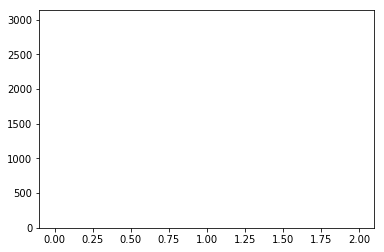

In [350]:
plt.hist(hi,
         bins = Total['Double'+dataType+'Run2017'+run]
        )

In [364]:
print(run,2983+1139+1)
for i in np.arange(0,10):
    print(i,np.sum((np.array(hi) == i)))

('F', 4123)
(0, 2983)
(1, 1139)
(2, 1)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
